In [43]:
import numpy as np
import pandas as pd
from Gen_data import SimulationStudy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML, NonParamDML
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import shap

In [64]:
#Create simulation objects

sim_1: SimulationStudy = SimulationStudy(p=20, mean_correlation=0.3, cor_variance=0.05, n=5000, geom=True)
simulation_1 = sim_1.create_dataset()

sim_2: SimulationStudy = SimulationStudy(p=30,mean_correlation=0.5, cor_variance=0.01, n=5000,  poly_degree=3)
simulation_2 = sim_2.create_dataset()

sim_3: SimulationStudy = SimulationStudy(p=30, mean_correlation=0.8, cor_variance=0.01, n=5000,  poly_degree=3)
simulation_3 = sim_3.create_dataset()


In [9]:
cov_matrix, mean = SimulationStudy.get_covariance_matrix(sim_1)
cov_matrix = pd.DataFrame(cov_matrix)
cov_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.260005,0.332092,0.426401,0.327809,0.344080,0.279557,0.259608,0.220724,0.408273,...,0.360059,0.223984,0.291687,0.339334,0.299857,0.381410,0.278571,0.356360,0.257892,0.242843
1,0.260005,1.000000,0.284483,0.334888,0.230585,0.302607,0.259198,0.300508,0.362406,0.275711,...,0.320504,0.365468,0.323612,0.417882,0.279545,0.360708,0.243413,0.311601,0.289514,0.232862
2,0.332092,0.284483,1.000000,0.322581,0.247513,0.312337,0.268417,0.272792,0.257550,0.352450,...,0.287723,0.263606,0.261122,0.335893,0.254278,0.325763,0.260729,0.290712,0.372608,0.282774
3,0.426401,0.334888,0.322581,1.000000,0.288808,0.360276,0.297505,0.325110,0.266950,0.267626,...,0.394313,0.278329,0.315790,0.417647,0.342551,0.241715,0.190251,0.304953,0.285598,0.358354
4,0.327809,0.230585,0.247513,0.288808,1.000000,0.328150,0.251612,0.318989,0.344951,0.241233,...,0.171882,0.277116,0.253915,0.271813,0.290976,0.284999,0.259894,0.249935,0.314298,0.203381
5,0.344080,0.302607,0.312337,0.360276,0.328150,1.000000,0.279439,0.367810,0.199136,0.248759,...,0.170102,0.208207,0.431603,0.341769,0.304924,0.290467,0.323122,0.360686,0.259297,0.416161
6,0.279557,0.259198,0.268417,0.297505,0.251612,0.279439,1.000000,0.319114,0.360893,0.312755,...,0.352100,0.193482,0.362503,0.339944,0.311629,0.269049,0.281806,0.332853,0.282832,0.351589
7,0.259608,0.300508,0.272792,0.325110,0.318989,0.367810,0.319114,1.000000,0.308230,0.323079,...,0.271889,0.265674,0.200871,0.373505,0.321097,0.306708,0.450866,0.261421,0.316191,0.303406
8,0.220724,0.362406,0.257550,0.266950,0.344951,0.199136,0.360893,0.308230,1.000000,0.207835,...,0.312749,0.259494,0.235959,0.233678,0.332705,0.351490,0.253609,0.341578,0.392082,0.300364
9,0.408273,0.275711,0.352450,0.267626,0.241233,0.248759,0.312755,0.323079,0.207835,1.000000,...,0.287927,0.238037,0.244652,0.312664,0.289929,0.318075,0.320027,0.229593,0.371570,0.325228


In [65]:
#Split into train and test set
def get_split(simulation: pd.DataFrame) -> np.ndarray:
    
    train_df, test_df = train_test_split(simulation, test_size=0.5, random_state=42)

    # Extract features and target variables for training
    X_train = train_df[[col for col in simulation.columns if col.startswith('X')]].to_numpy()
    T_train = train_df[['T']].to_numpy()
    Y_train = train_df['y'].to_numpy()

    # Extract features and true CATE for testing
    X_test = test_df[[col for col in simulation.columns if col.startswith('X')]].to_numpy()
    T_test = test_df[['T']].to_numpy()
    y_test = test_df['y'].to_numpy()

    true_cate_test = test_df['CATE'].to_numpy()

    return train_df, test_df, X_train, Y_train, T_train, X_test, T_test, y_test, true_cate_test

In [66]:
train_df_1, test_df_1, X_train_1, Y_train_1, T_train_1, X_test_1, T_test_1, y_test_1, true_cate_test_1 = get_split(simulation_1)
train_df_2, test_df_2, X_train_2, Y_train_2, T_train_2, X_test_2, T_test_2, y_test_2, true_cate_test_2 = get_split(simulation_2)
train_df_3, test_df_3, X_train_3, Y_train_3, T_train_3, X_test_3, T_test_3, y_test_3, true_cate_test_3 = get_split(simulation_3)

OLS Model

In [10]:
#Create OLS model
ols = LinearRegression()

In [11]:
#Estimate a fully feature-treatment interacted model
interaction_term = X_train_1 * T_train_1
X_train_ols = np.hstack([X_train_1, T_train_1, interaction_term])

ols.fit(X_train_ols, Y_train_1)


LinearRegression()

In [12]:
#Cannot currently estimate CATE functions from OLS to compare with true CATEs
#Treatment and control groups have different sizes

interaction_term_test = X_test_1 * T_test_1
X_test_ols = np.hstack([X_test_1, T_test_1, interaction_term_test])

treatment_col_index = sim_1.p

# Generate treatment and control groups
treatment_group = X_test_ols[X_test_ols[:, treatment_col_index] == 1]
control_group = X_test_ols[X_test_ols[:, treatment_col_index] == 0]

# Predict outcomes
pred_treatment = ols.predict(treatment_group)
pred_control = ols.predict(control_group)

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(estimated_cate_ols, true_cate_test_1, alpha=0.5, label='OLS')
plt.plot([min(true_cate_test_1), max(true_cate_test_1)], [min(true_cate_test_1), max(true_cate_test_1)], '--', color='red')
plt.xlabel('Estimated CATE')
plt.ylabel('True CATE')
plt.title('Estimated vs. True CATE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
estimated_cate_ols=estimated_cate_ols.reshape(-1, 1)
true_cate_test=true_cate_test_1.reshape(-1,1)
reg = LinearRegression().fit(estimated_cate_ols, true_cate_test)
reg.score(estimated_cate_ols, true_cate_test)

Causal Forest DML

In [ ]:
#define model_t to reflect known treatment probabilities
model_t = DummyClassifier()

#Estimate the causal forest model
est_cfdml = CausalForestDML(model_y='auto',
                      model_t=model_t,
                      discrete_treatment=True,
                      cv=5,
                      n_estimators=1000,
                     #featurizer=PolynomialFeatures(degree=3, include_bias=False),
                      random_state=42,
                      criterion='mse',
                      honest=True)

est_cfdml.fit(Y=Y_train_1, T=T_train_1, X=X_train_1, W=None, cache_values=True)
estimated_cate = est_cfdml.effect(X_test_1)

In [61]:
estimated_cate = estimated_cate.reshape(-1, 1)
reg = LinearRegression().fit(estimated_cate, true_cate_test_1)
reg.score(estimated_cate, true_cate_test_1)

0.6942427281475192

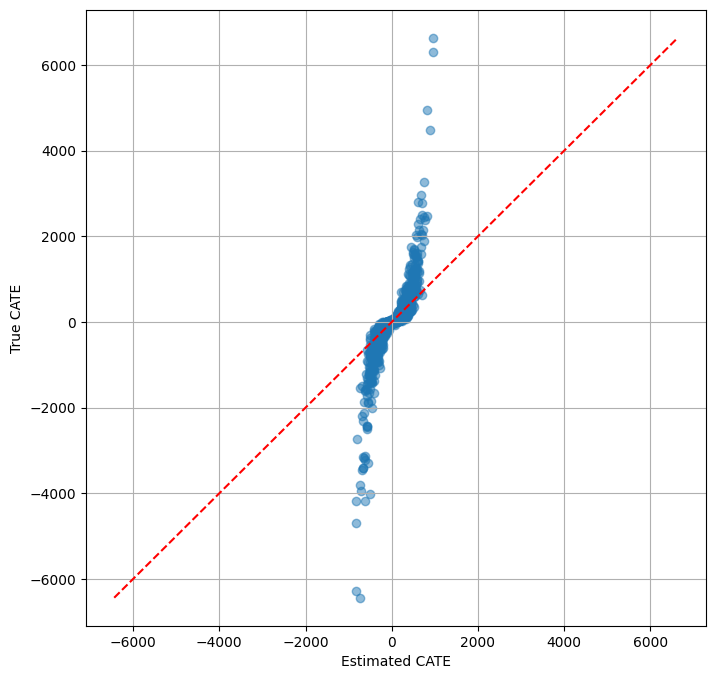

In [ ]:
#Plot true CATE and estimate DML CATE
plt.figure(figsize=(8, 8))
plt.scatter(estimated_cate, true_cate_test_1, alpha=0.5)
plt.plot([min(true_cate_test_1), max(true_cate_test_1)], [min(true_cate_test_1), max(true_cate_test_1)], '--', color='red')
plt.xlabel('Estimated CATE')
plt.ylabel('True CATE')
plt.grid(True)
plt.show()

Non-Parametric DML

In [23]:
est_npm = NonParamDML(
    model_y='auto',
    model_t=model_t,
    model_final=RandomForestRegressor(),
    cv = 5,
    random_state = 42,
    discrete_treatment=True
)
est_npm.fit(Y=Y_train_1, T=T_train_1, X=X_train_1, W=None, cache_values=True)

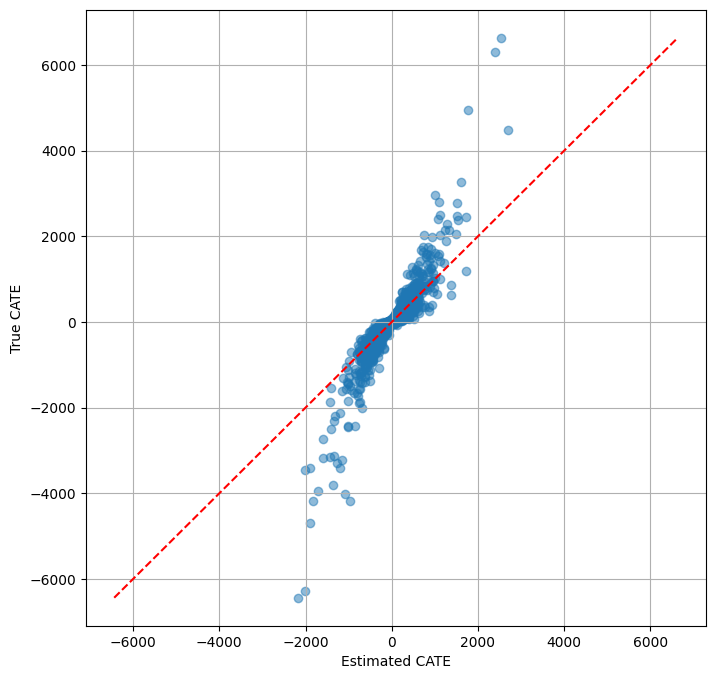

In [24]:
#Plot true CATE and estimate DML CATE
estimated_cate = est_npm.effect(X_test_1)

plt.figure(figsize=(8, 8))
plt.scatter(estimated_cate, true_cate_test_1, alpha=0.5)
plt.plot([min(true_cate_test_1), max(true_cate_test_1)], [min(true_cate_test_1), max(true_cate_test_1)], '--', color='red')
#plt.plot()
plt.xlabel('Estimated CATE')
plt.ylabel('True CATE')
plt.grid(True)
plt.show()

In [25]:
estimated_cate=estimated_cate.reshape(-1, 1)
reg = LinearRegression().fit(estimated_cate, true_cate_test_1)
reg.score(estimated_cate, true_cate_test_1)

0.8075768869685067